# Visualizations in the OpenFF Toolkit

OpenFF [`Molecule`] and [`Topology`] objects provide some facilities for visualization in Jupyter notebooks. This can be useful for inspecting molecules and topologies!

There are two ways to invoke the visualization:
- implicitly, by _evaluating_ the object in a cell
- explicitly, by calling [`Molecule.visualize()`]

There are currently three backends, each using a different external tool:
- RDKit (default)
- OpenEye (requires OpenEye Toolkits installed and licensed)
- NGLview (requires conformers)

The backend can be explicitly chosen with the `backend` argument.

[`Topology`] visualization works similarly by calling [`Topology.visualize()`]. However, there is no `backend` argument and it defaults to using NGLview for a 3D representation.

[`Molecule.visualize()`]: https://docs.openforcefield.org/projects/toolkit/en/stable/api/generated/openff.toolkit.topology.Molecule.html#openff.toolkit.topology.Molecule.visualize
[`Molecule`]: https://docs.openforcefield.org/projects/toolkit/en/stable/api/generated/openff.toolkit.topology.Molecule.html
[`Topology.visualize()`]: https://docs.openforcefield.org/projects/toolkit/en/stable/api/generated/openff.toolkit.topology.Topology.html#openff.toolkit.topology.Topology.visualize
[`Topology`]: https://docs.openforcefield.org/projects/toolkit/en/stable/api/generated/openff.toolkit.topology.Topology.html

<details><summary>Troubleshooting if NGLView doesn't work</summary>
This notebook below demonstrates usage of <code>nglview</code> with <code>openforcefield</code>. This can be tricky to get working. You may need to run an additional command after creating the Conda environment.
    
To configure for use with Jupyter Notebooks:

<pre>
    jupyter-nbextension enable nglview --py --sys-prefix
</pre>
<br />

To use with Jupyter Lab, configure with:

<pre>
    jupyter labextension install  nglview-js-widgets
    jupyter-labextension install @jupyter-widgets/jupyterlab-manager
</pre>
<br />

For NGLView ≥ 3.0.0, the above should not be necessary; however, it is not yet compatible with Jupyter Lab ≥ 4.0.0.
</details>

In [1]:
from openff.toolkit import Molecule, Topology

## Implicit visualization

When you run a cell with an object in the last line, IPython makes an effort to display some sort of representation - for a class or built-in type, this looks like its `__repr__` method. Here we call this _implicit_ visualization.

The toolkit will try to visualize a molecule using `nglview` if it has conformers. If it does not, it tries `rdkit` and then `openeye` (in that order).

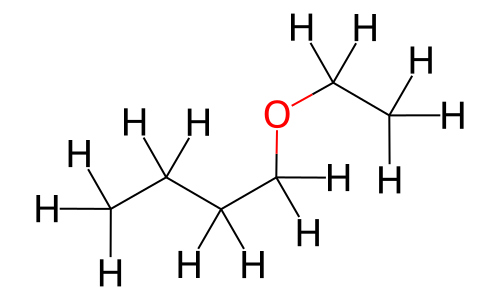

In [2]:
m = Molecule.from_smiles("CCCCOCC")
m

The regular `display()` call works on `Molecule` objects too.

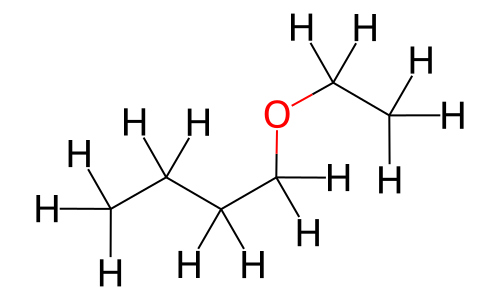

In [3]:
display(m)  # noqa

## Explicit visualization

_Explicit_ visualization is how we're describing the use of `Molecule.visualize()`. It works as one would expect:

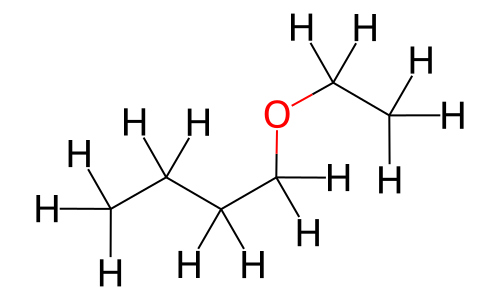

In [4]:
m.visualize()

This method can take a `backend` parameter, which defaults to `rdkit`:

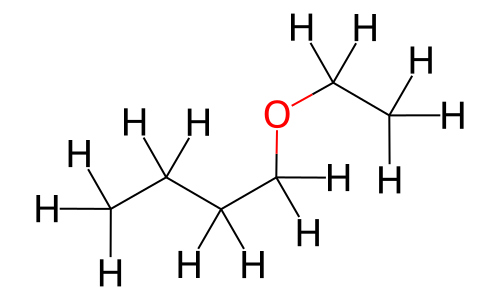

In [5]:
m.visualize(backend="rdkit")

`openeye` can also be used, if available:

In [6]:
try:
    from openeye import oechem

    assert oechem.OEChemIsLicensed()

    m.visualize(backend="openeye")
except (ImportError, AssertionError):
    print('Visualizing with `backend="openeye"` requires the OpenEye Toolkits')

`nglview`, if installed, can only be used if conformers have been generated:

In [7]:
try:
    m.visualize(backend="nglview")  # this will fail because we have no conformers yet
except ValueError as excinfo:
    print(str(excinfo))
    print(f"this molecule has {m.n_conformers=}")

Visualizing with NGLview requires that the molecule has conformers, found self.conformers=None
this molecule has m.n_conformers=0


But, once you generate them, it works! You can zoom in/out, rotate and translate the molecule. You can even inspect the different conformers (if available) using the trajectory player:

In [8]:
m.generate_conformers()
m.visualize(backend="nglview")

NGLWidget(max_frame=2)

For example, a benzene molecule will not typically have multiple conformers, so you won't see the trajectory player.

In [9]:
benzene = Molecule.from_smiles("c1ccccc1")
benzene.generate_conformers()
benzene

NGLWidget()

Notice that, once conformers are available, the implicit representation will use `nglview` to provide a 3D visualization.

It's also possible with any backend to hide non-polar hydrogens, which may produce a more readable image:

In [10]:
m.visualize(backend="nglview", show_all_hydrogens=False)

NGLWidget(max_frame=2)

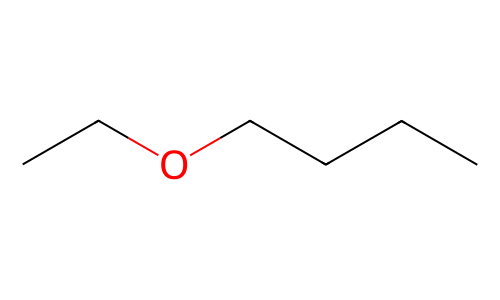

In [11]:
m.visualize(backend="rdkit", show_all_hydrogens=False)

If you're using a strangely-shaped molecule or otherwise want the display to be larger or smaller, you can fiddle with the `width` and `height` arguments (defaults are 500 and 300). These arguments are ignored with the NGLview backend.

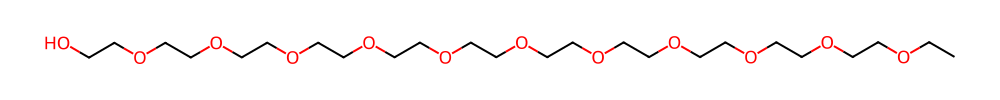

In [12]:
ether = Molecule.from_smiles(12 * "CCO")
ether.visualize(
    width=1000,
    height=100,
    show_all_hydrogens=False,
)

Topologies can also be explicitly visualized:

In [13]:
from openff.toolkit.utils.utils import get_data_file_path

topology = Topology.from_pdb(
    get_data_file_path("systems/test_systems/T4_lysozyme_water_ions.pdb")
)

In [ ]:
w = topology.visualize()
w

However, they don't currently support implicit visualization for performance reasons. Note that, again for performance reasons, `Topology` by default does not guarantee to correctly represent connectivity; in the future there may be an implementation that makes an effort to do this.